# Performance Comparison
* So we need to get all dataset in this folder at first.
  - `$ wget https://cs.uef.fi/sipu/datasets/MopsiLocationsUntil2012-Finland.txt`

In [3]:
from KMeans import KMeans as MyKMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans as KMeans
from sklearn.metrics import silhouette_score, v_measure_score

# The function which evaluate the value of silhouette_score, v_measure_score
def evaluate_clusters(true_labels, predicted_labels):
    silhouette_avg = silhouette_score(X, predicted_labels)
    v_measure = v_measure_score(true_labels, predicted_labels)
    return silhouette_avg, v_measure

X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)

my_kmeans = MyKMeans(k=4)
predicted_labels, centroids_own = my_kmeans.fit(X)

# Evaluate my KMeans
silhouette_mykmeans, v_measure_mykmeans = evaluate_clusters(cluster_assignments, predicted_labels)

# Using scikit-learn KMeans
kmeans_sklearn = KMeans(n_clusters=4, random_state=0).fit(X)
predicted_labels_sklearn = kmeans_sklearn.labels_
silhouette_sklearn, v_measure_sklearn = evaluate_clusters(cluster_assignments, predicted_labels_sklearn)

print(f"My KMeans: Silhouette Score = {silhouette_mykmeans}, V-measure Score = {v_measure_mykmeans}")
print(f"Scikit-learn KMeans: Silhouette Score = {silhouette_sklearn}, V-measure Score = {v_measure_sklearn}")

My KMeans: Silhouette Score = 0.6793681242487379, V-measure Score = 0.993647196794607
Scikit-learn KMeans: Silhouette Score = 0.6793681242487379, V-measure Score = 0.993647196794607


## Two comparisons
 * They have the same scores and show them in seaborn are the same.

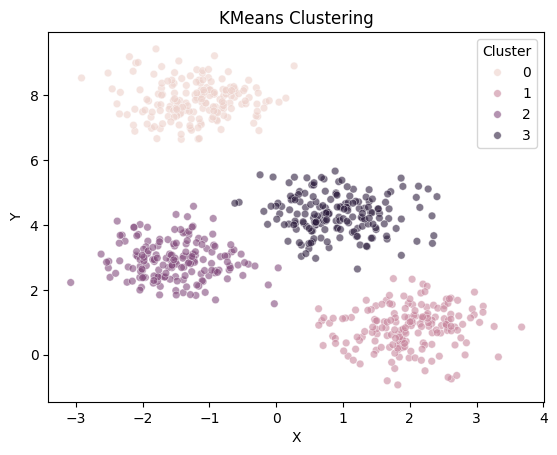

In [4]:
kmeans_sklearn = KMeans(n_clusters=4, random_state=0).fit(X)

df = pd.DataFrame(X, columns=['X', 'Y'])
df['Cluster'] = kmeans_sklearn.labels_

sns.scatterplot(data=df, x='X', y='Y', hue='Cluster', s=30, alpha=0.6)
plt.title('KMeans Clustering')

plt.show()


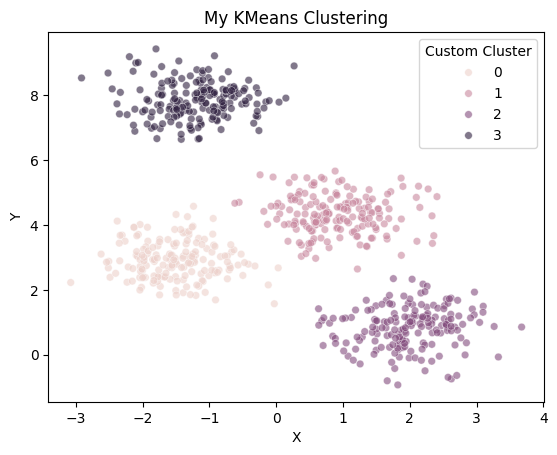

In [5]:
X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)
kmeans = MyKMeans(k=4, max_iterations=100, balanced=False)
labels, centroids = kmeans.fit(X)

df = pd.DataFrame(X, columns=['X', 'Y'])
df['Custom Cluster'] = labels

sns.scatterplot(data=df, x='X', y='Y', hue='Custom Cluster', s=30, alpha=0.6)
plt.title('My KMeans Clustering')

plt.show()

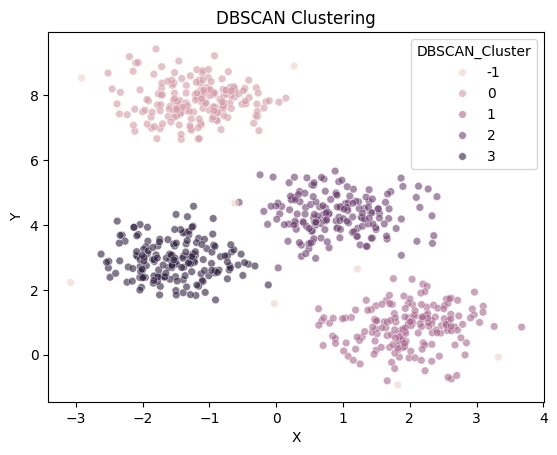

In [6]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)

df = pd.DataFrame(X, columns=['X', 'Y'])
df['DBSCAN_Cluster'] = dbscan.labels_

sns.scatterplot(data=df, x='X', y='Y', hue='DBSCAN_Cluster', s=30, alpha=0.6)
plt.title('DBSCAN Clustering')

plt.show()

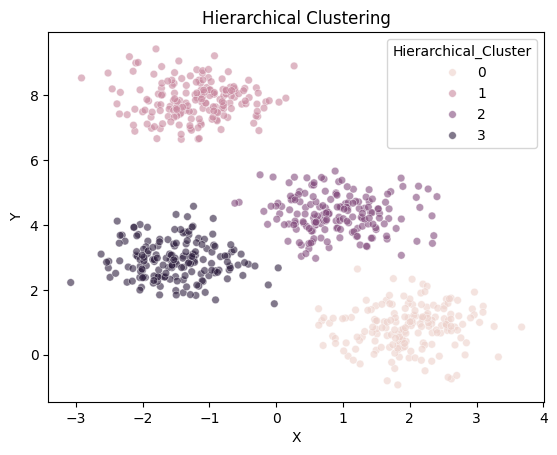

In [7]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=4).fit(X)

df['Hierarchical_Cluster'] = hierarchical.labels_

sns.scatterplot(data=df, x='X', y='Y', hue='Hierarchical_Cluster', s=30, alpha=0.6)
plt.title('Hierarchical Clustering')

plt.show()

In [8]:
df1 = pd.read_csv('Taxi_Trips__2013-2023_.csv')
df1

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,52dc9029821e61db30a51838cb3cd711bd0e03cb,275f3f891b8c0ba8f2958873f850d2a03993c99f5f79f6...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,1140.0,11.20,NaN,NaN,76.0,NaN,...,21.0,49.75,Cash,4053 - 40193 Adwar H. Nikola,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
1,11eeb6710caa0606028c7ba025bfa18c277886e8,6c87f1d023a9d7146ae81b6aa4648bf98cec52cceb9f08...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,660.0,2.70,NaN,NaN,32.0,7.0,...,0.0,13.00,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
2,113aa7bf346c585bb941cda2d5c0015c8a1472f0,bb4e75d3065311c33024a434640731c43fd2cf9e4482eb...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,480.0,0.00,NaN,NaN,8.0,24.0,...,0.0,9.75,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
3,2503e3944e5c82b89638447ad361638111129375,57c40509cae37a0e5e536a657cdb7f8c6824314bc466a7...,02/01/2023 12:15:00 AM,02/01/2023 12:45:00 AM,1620.0,0.00,1.703198e+10,NaN,76.0,NaN,...,28.0,91.00,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN
4,23ddcfba2ad714fe0303909961ea74873be50da2,40720025b84fa778c47d6637db01b1d8f2de2eabafa529...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,360.0,0.10,NaN,NaN,76.0,NaN,...,4.0,13.75,Cash,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101783,9209df4c3541198fda3173a226f2df619a806022,dee6032433df09fe8d3fd4fa958380308c902dc98f81c3...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,760.0,2.69,1.703183e+10,1.703132e+10,28.0,32.0,...,0.0,10.90,Mobile,Medallion Leasin,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
101784,f0957a8f6bef37bb2872649fb3c76ad1a179acab,3f6562a2a18861cf21a21101c14cc91dd7c4d72cdce80f...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,4.0,0.00,NaN,NaN,8.0,8.0,...,0.0,77.40,Credit Card,Chicago Independents,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
101785,4cb74df671cfccceb9b592f347ef1a94c1540c7a,b31f46efa11263565e3dba91f26ff96b74516e8108ac56...,02/14/2023 10:30:00 AM,02/14/2020 06:00:00 PM,NaN,2.90,NaN,NaN,8.0,24.0,...,0.0,13.50,Cash,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
101786,7f24c5101df65952ef318f558b8b071989ff7c17,65057dc10e707a18a32bc4371c5db0b828e90f9caf1068...,04/27/2023 11:15:00 AM,04/21/2019 09:30:00 PM,NaN,15.10,NaN,NaN,76.0,7.0,...,4.0,52.90,Credit Card,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)


In [9]:
df1.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,101763.000000,101788.000000,3.517900e+04,3.505400e+04,95650.000000,92192.000000,101681.000000,101681.000000,101681.000000,101681.000000,101681.000000,95657.000000,95657.000000,92489.000000,92489.000000
mean,1102.644891,6.021135,1.703149e+10,1.703140e+10,33.230946,25.300764,20.466054,2.452347,0.014503,1.679117,24.739358,41.898703,-87.689956,41.892116,-87.657546
std,1831.031101,7.572349,3.696445e+05,3.377955e+05,25.309183,20.270499,18.103452,3.918353,0.602782,5.208910,22.641634,0.064621,0.104274,0.059306,0.063430
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625
25%,420.000000,0.870000,1.703108e+10,1.703108e+10,8.000000,8.000000,7.750000,0.000000,0.000000,0.000000,9.500000,41.878866,-87.695013,41.878866,-87.663518
50%,836.000000,2.600000,1.703132e+10,1.703132e+10,32.000000,28.000000,13.500000,0.000000,0.000000,0.000000,16.000000,41.895033,-87.642649,41.892508,-87.633308
75%,1516.000000,10.800000,1.703184e+10,1.703184e+10,50.000000,32.000000,31.000000,3.000000,0.000000,1.000000,33.900000,41.949829,-87.626211,41.922686,-87.625192
max,86003.000000,814.300000,1.703198e+10,1.703198e+10,77.000000,77.000000,999.000000,250.000000,78.000000,182.000000,999.000000,42.015934,-87.534903,42.021224,-87.534903


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     101788 non-null  object 
 1   Taxi ID                     101779 non-null  object 
 2   Trip Start Timestamp        101788 non-null  object 
 3   Trip End Timestamp          101788 non-null  object 
 4   Trip Seconds                101763 non-null  float64
 5   Trip Miles                  101788 non-null  float64
 6   Pickup Census Tract         35179 non-null   float64
 7   Dropoff Census Tract        35054 non-null   float64
 8   Pickup Community Area       95650 non-null   float64
 9   Dropoff Community Area      92192 non-null   float64
 10  Fare                        101681 non-null  float64
 11  Tips                        101681 non-null  float64
 12  Tolls                       101681 non-null  float64
 13  Extras        

### Questions
* 1. The reason why you chose the clustering algorithm(s)
 - KMeans is simplicity and efficiency in grouping data. Given the dropoff location data, which likely forms natural groupings based on geographical proximity.  
    
* 2. Any pre-processing of the data or any hyperparameter settings
 - I remove any rows with missing values in the 'Dropoff Centroid Latitude' and 'Dropoff Centroid Longitude' columns.
 - Number of Clusters set to 5
 - Random State set to 0
     
* 3. Output from the algorithm(s) -- show what clusters were generated
 - The clusters generated represent geographical groupings of dropoff centroid points. These groups may correspond to different  areas of interest within the city
   
* 4. The metrics you used to evaluate the output. What kind of performance did you get from
that algorithm? Is that what you expected?
 - I expected obviously clustering performance in this method.
 - Silhouette score is a measure of similar an object is to its own cluster compared to other clusters.
 - 0.965 is high, shows pretty good clustering performance in KMeans.

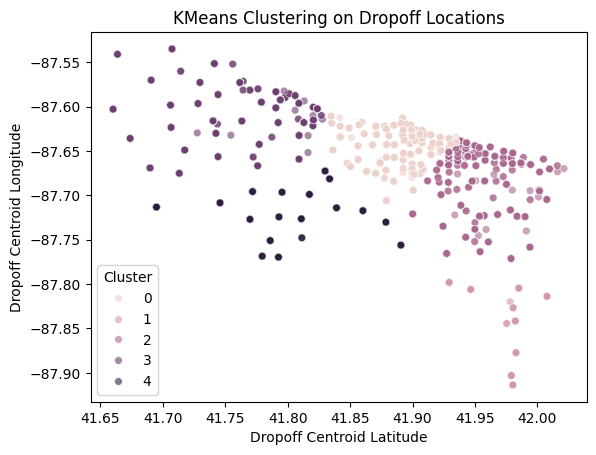

In [11]:
dropoff_locations = df1[['Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']].dropna()

kmeans_dropoff = KMeans(n_clusters=5, random_state=0).fit(dropoff_locations)

dropoff_locations['Cluster'] = kmeans_dropoff.labels_

sns.scatterplot(data=dropoff_locations, x='Dropoff Centroid Latitude', y='Dropoff Centroid Longitude', hue='Cluster', s=30, alpha=0.6)
plt.title('KMeans Clustering on Dropoff Locations')

plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

silhouette_avg = silhouette_score(dropoff_locations, kmeans_dropoff.labels_)
print(f"Silhouette Score for KMeans Clustering: {silhouette_avg}")

### Questions
* 1. The reason why you chose the clustering algorithm(s)
 - KMeans and Hierarchical are efficiency in grouping data. 
    
* 2. Any pre-processing of the data or any hyperparameter settings
 - I remove any rows with missing values in the 'X' and 'Y' columns.
 - Number of Clusters set to 3
 - Random State set to 0
     
* 3. Output from the algorithm(s) -- show what clusters were generated
 - The clusters generated represent geographical spread of points. These groups may correspond to different modes of transportation or activity areas.
   
* 4. The metrics you used to evaluate the output. What kind of performance did you get from
that algorithm? Is that what you expected?
 - I expected both KMeans and Hierarchical are efficiency in this dataset. 
 - KMeans showing slightly higher efficiency as reflected by its Silhouette Score.
 - There are some points with different clusters in a certain area.
 - Silhouette score is higher in KMeans algorit. So use kMeans is better in this dataset.

In [ ]:
# df2 = pd.read_csv('MopsiLocationsUntil2012-Finland.txt', sep='\t')
df2 = pd.read_csv('MopsiLocationsUntil2012-Finland.txt', sep='\t', names=['X', 'Y']).dropna()
df2

In [ ]:
df2.describe()

In [ ]:
df2.info()

In [ ]:
kmeans_df2 = KMeans(n_clusters=3, random_state=0).fit(df2[['X', 'Y']])

df2['Cluster'] = kmeans_df2.labels_

sns.scatterplot(data=df2, x='X', y='Y', hue='Cluster', s=30, alpha=0.6)
plt.title('KMeans Clustering on Mopsi Data')

plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg2 = silhouette_score(df2, kmeans_df2.labels_)
print(f"Silhouette Score for KMeans Clustering: {silhouette_avg2}")

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=3)
df2['Cluster_Hierarchical'] = agglomerative.fit_predict(df2[['X', 'Y']])

sns.scatterplot(data=df2, x='X', y='Y', hue='Cluster_Hierarchical', s=30, alpha=0.6)
plt.title('Hierarchical Clustering on Mopsi Data')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df2[['X', 'Y']], df2['Cluster_Hierarchical'])
print(f'Silhouette Score: {silhouette_avg}')